- Step 1:Load the data

In [2]:
import pandas as pd

credit_df = pd.read_csv(r"C:\Users\bezis\Downloads\fraud-detection\fraud-detection\data\raw\creditcard.csv")
credit_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Step 2: Data Cleaning

In [3]:
print(credit_df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Check for duplicates
credit_df = credit_df.drop_duplicates()


In [5]:
# All features are numeric already (float64), target is int
credit_df['Class'] = credit_df['Class'].astype(int)


- Step 3: Exploratory Data Analysis (EDA)

In [7]:
print(credit_df['Class'].value_counts(normalize=True))


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


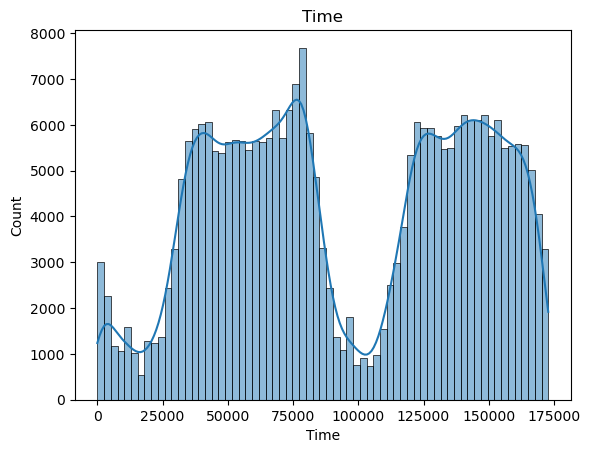

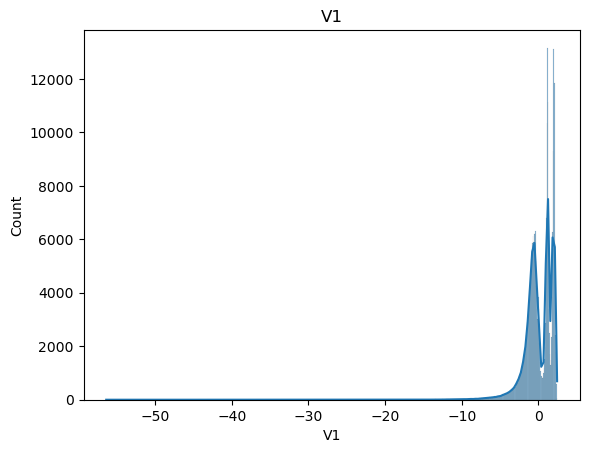

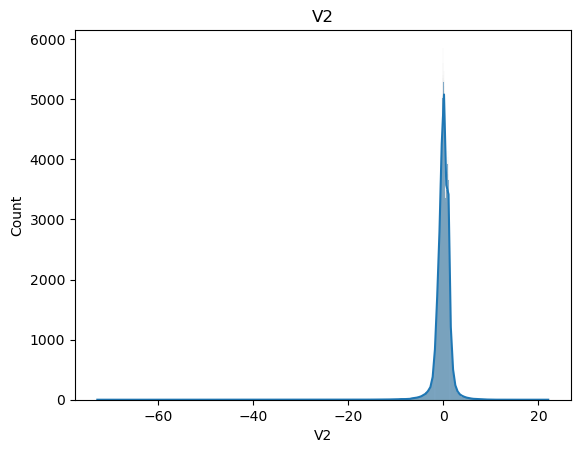

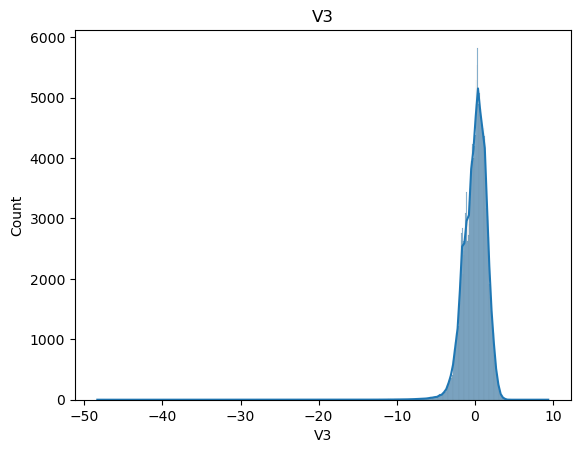

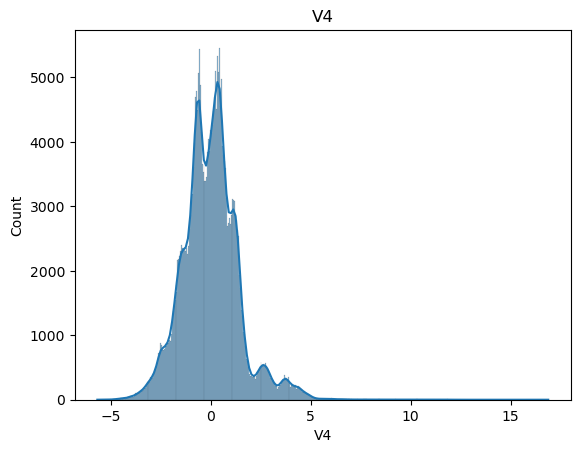

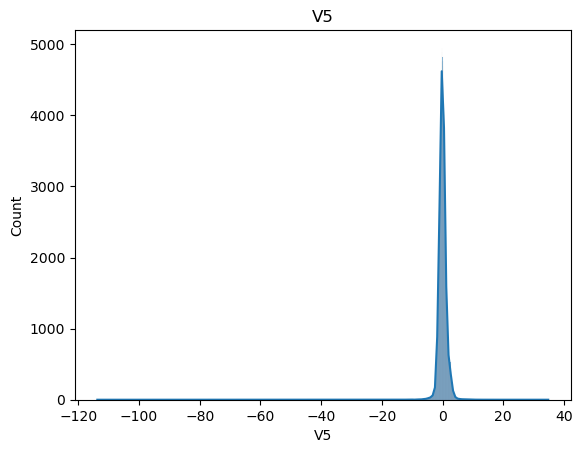

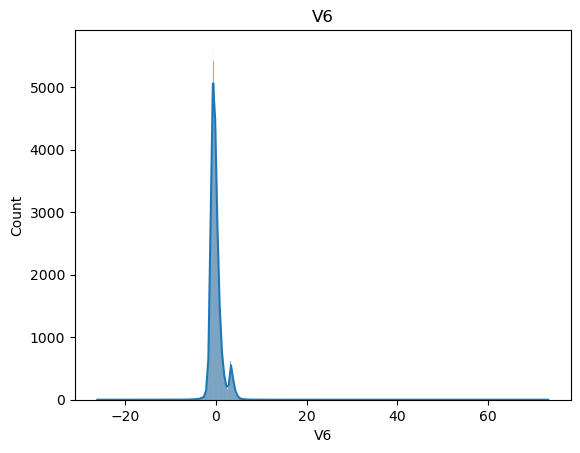

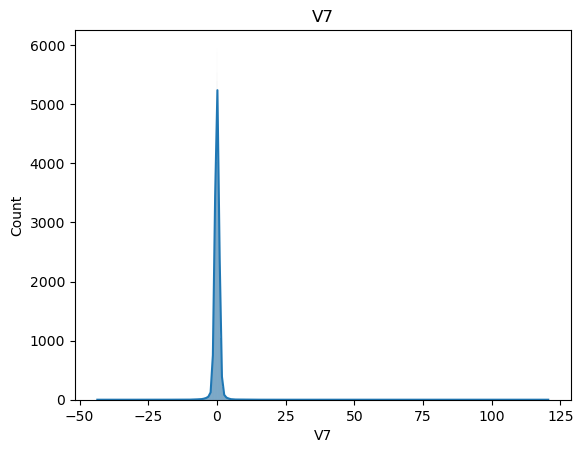

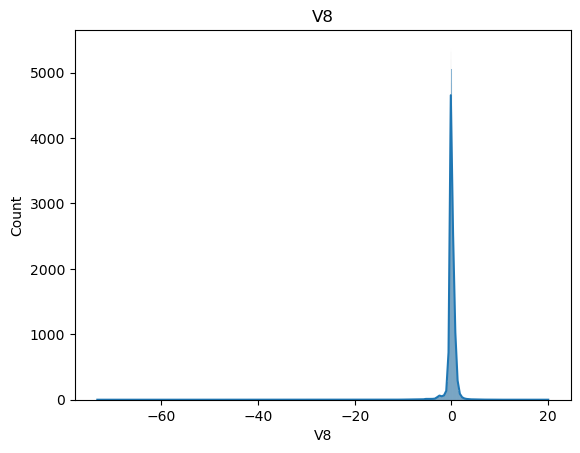

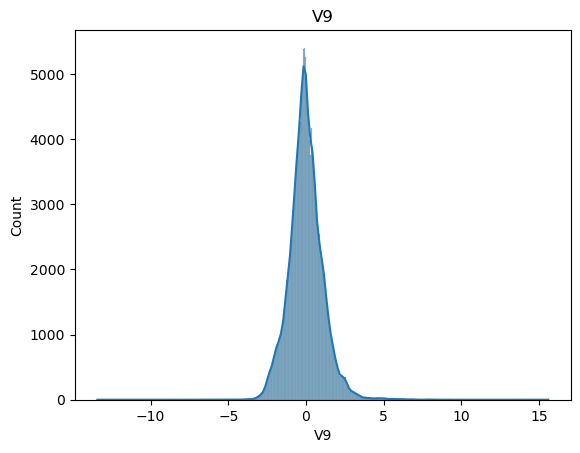

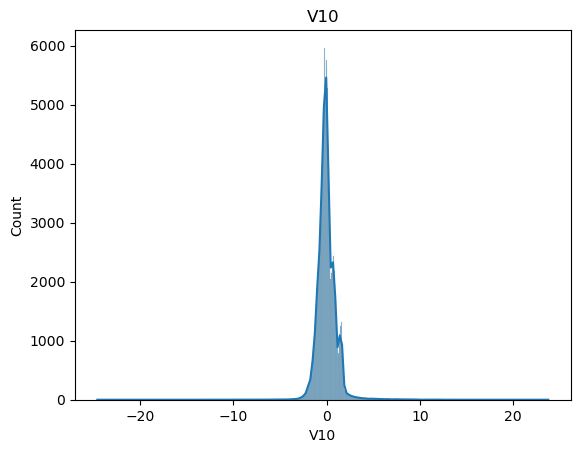

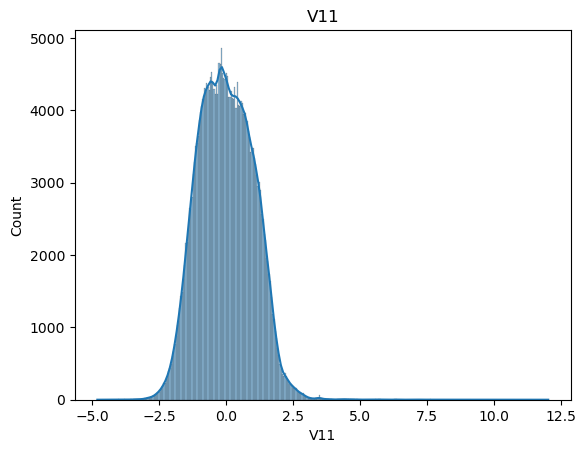

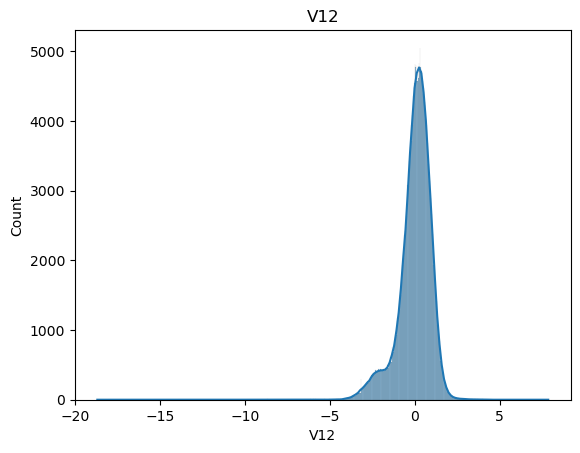

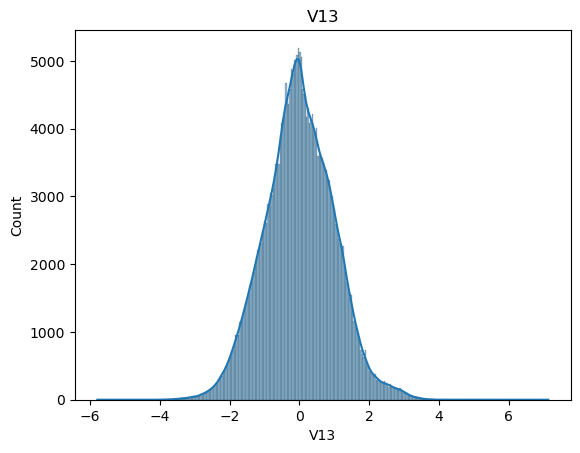

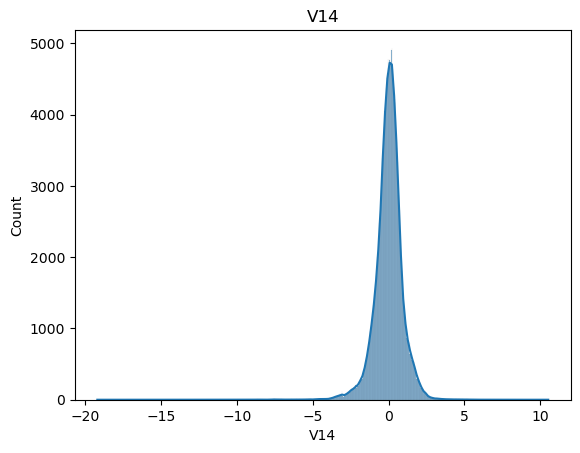

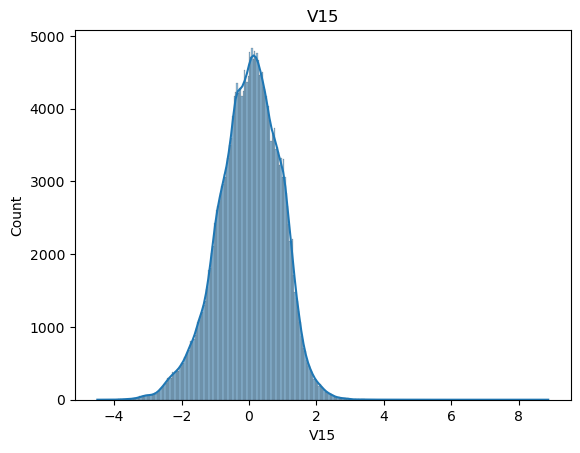

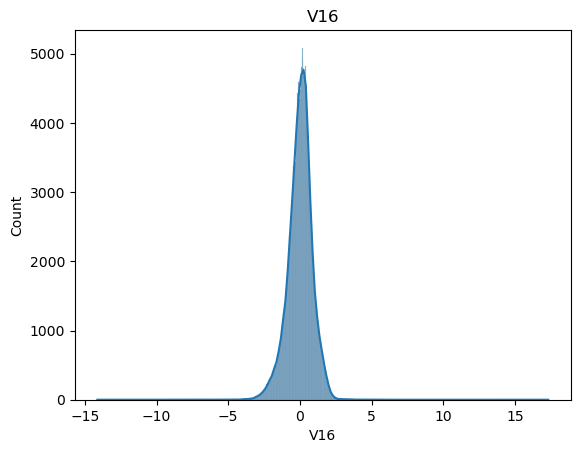

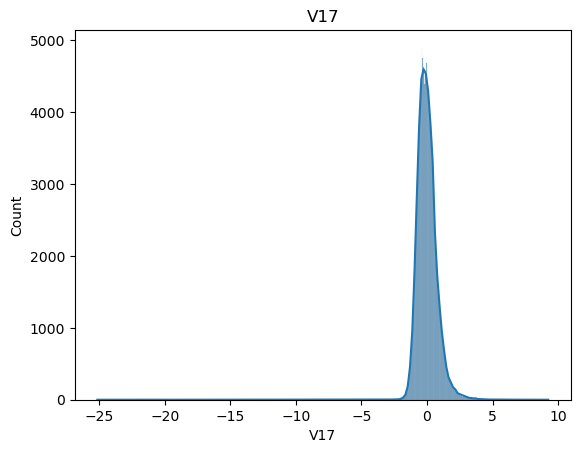

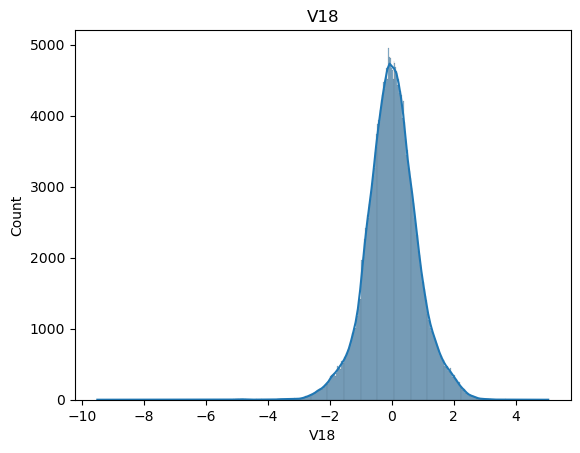

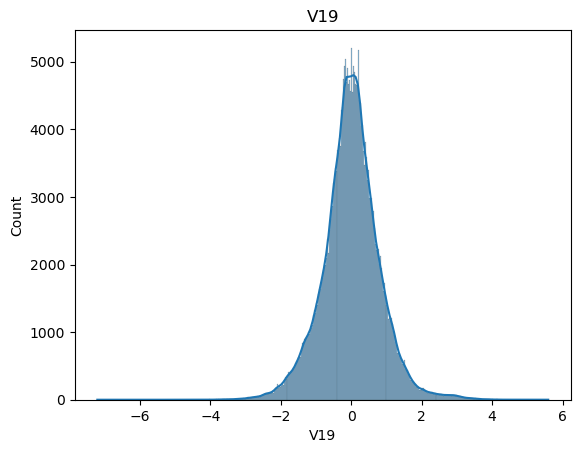

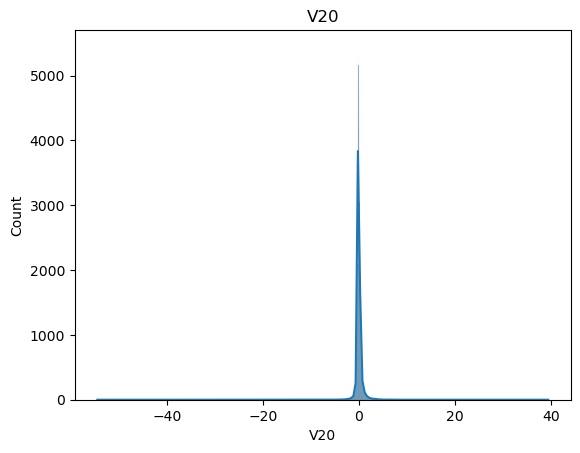

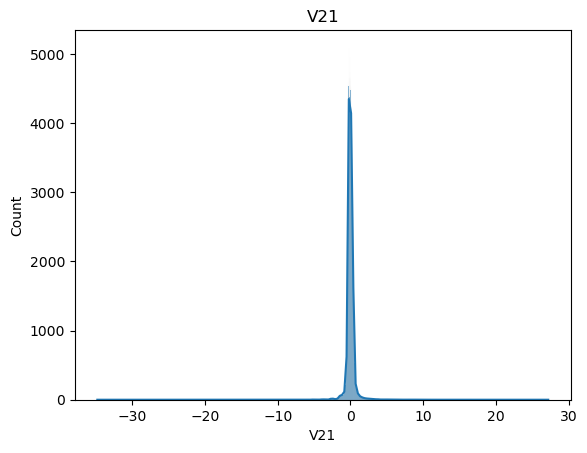

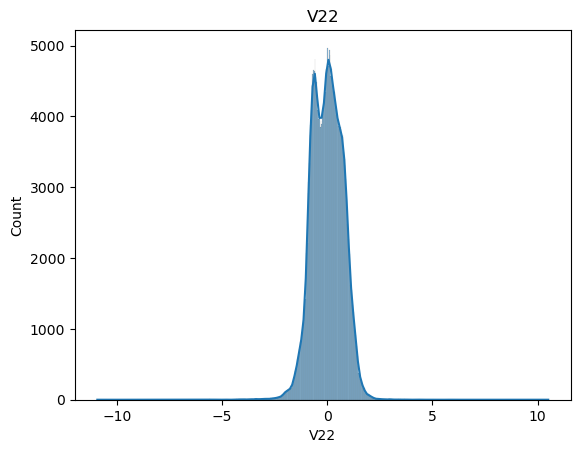

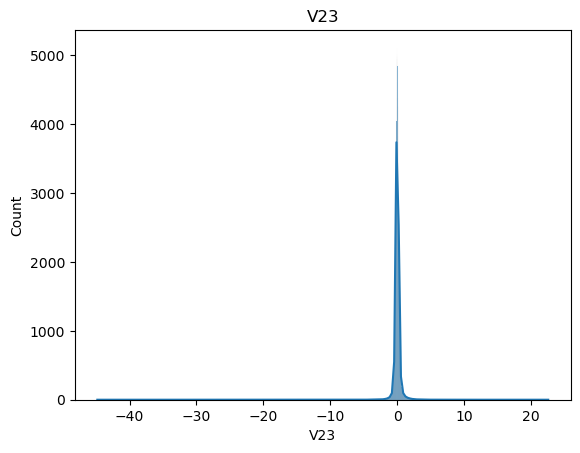

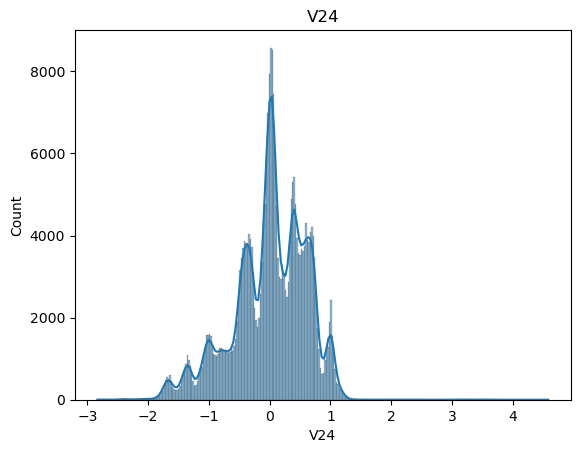

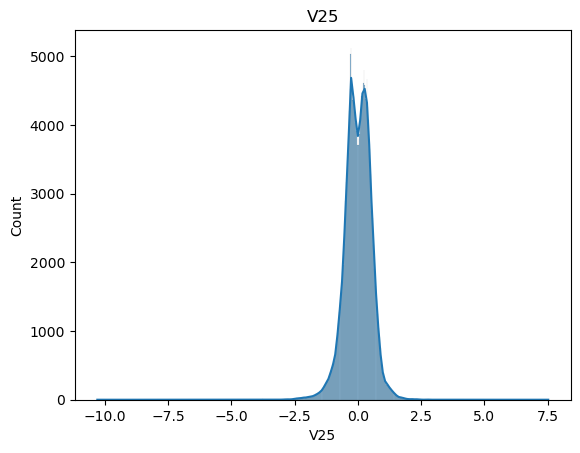

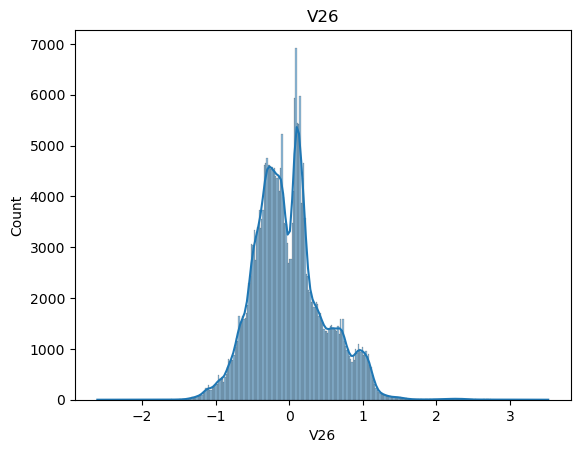

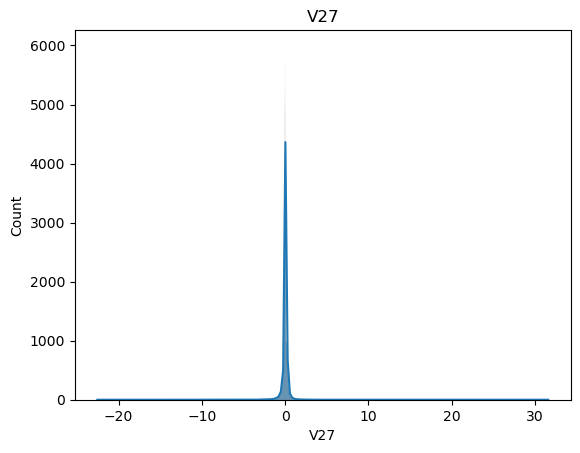

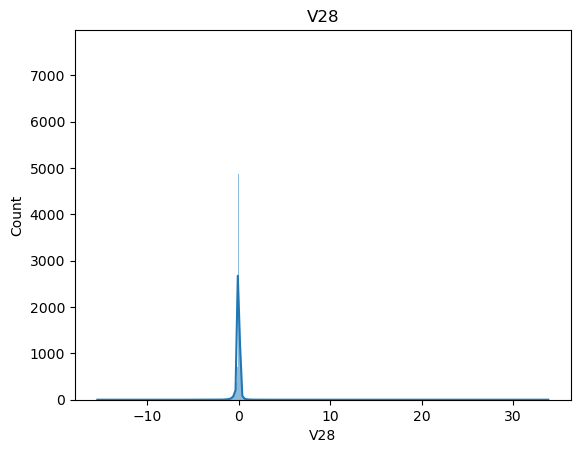

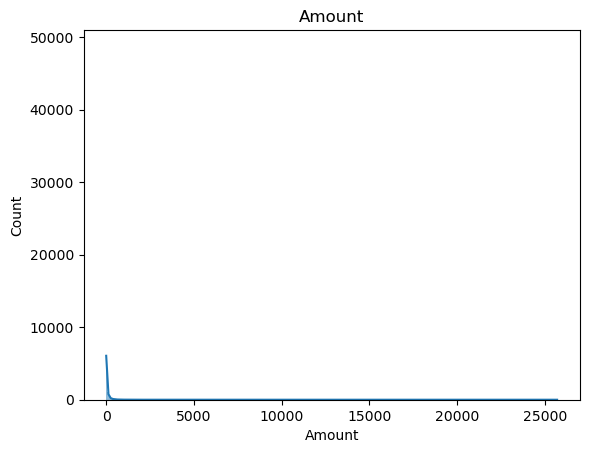

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = credit_df.columns.drop('Class')  # all except target
for col in numeric_cols:
    sns.histplot(credit_df[col], kde=True)
    plt.title(col)
    plt.show()


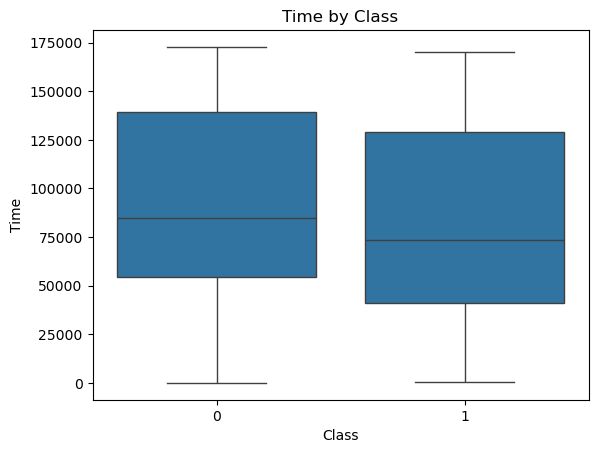

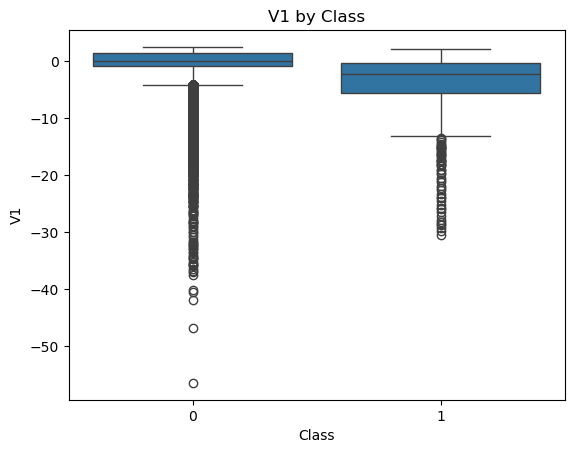

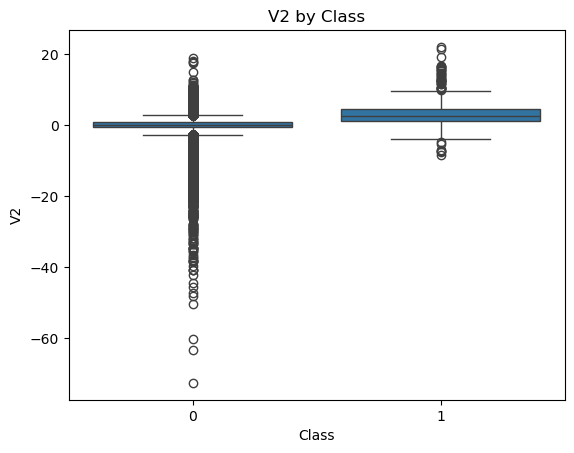

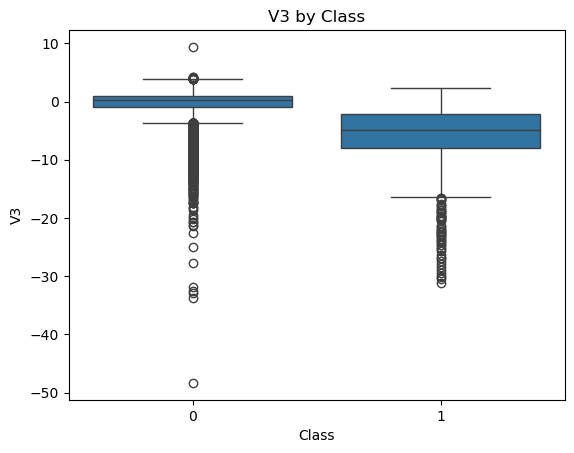

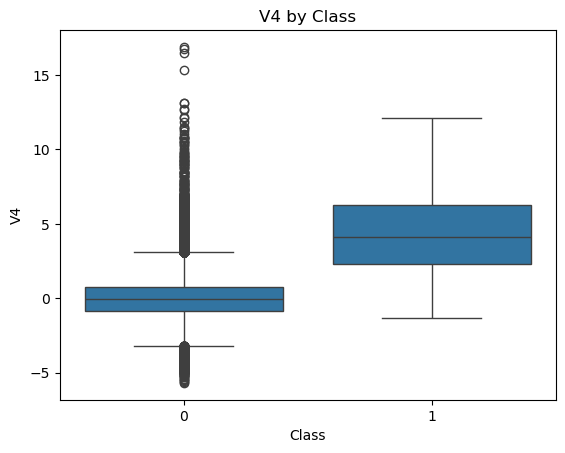

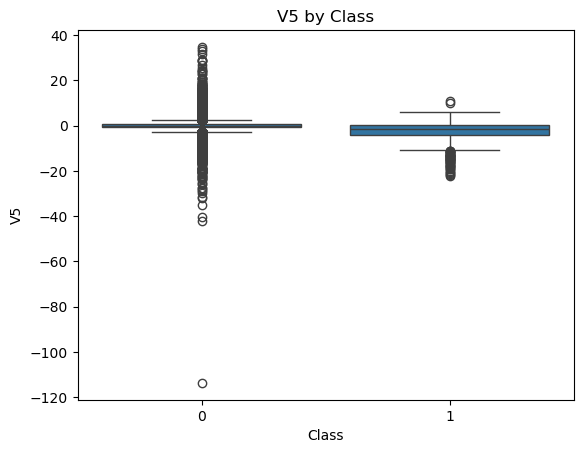

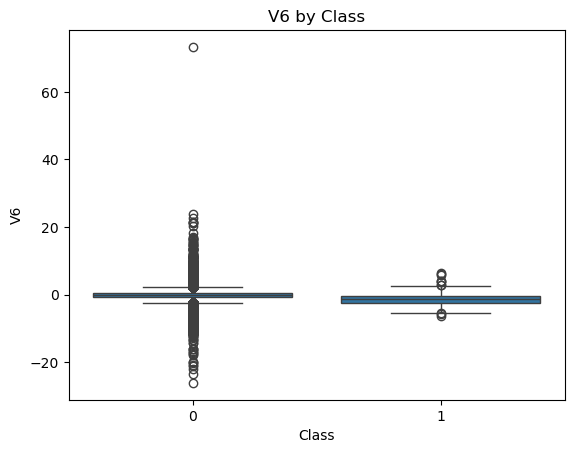

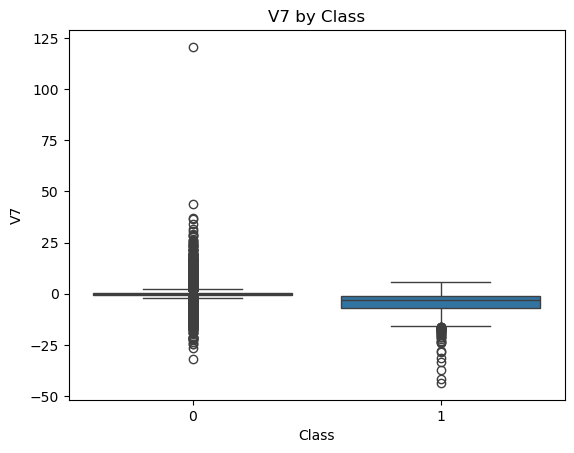

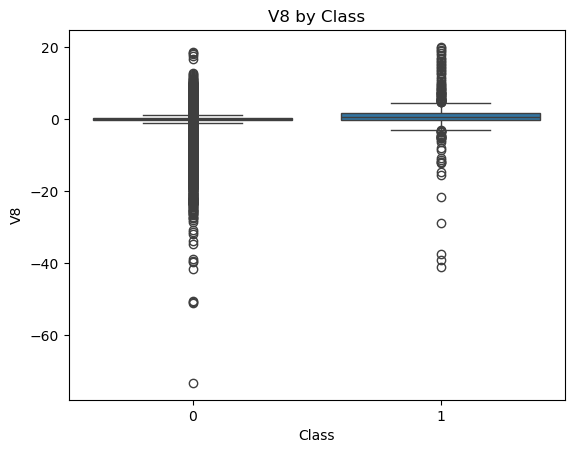

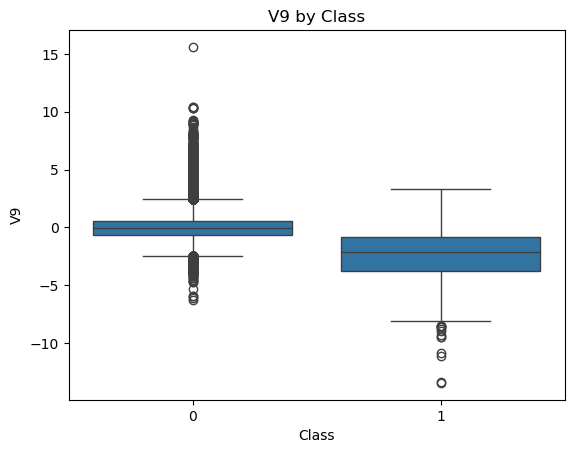

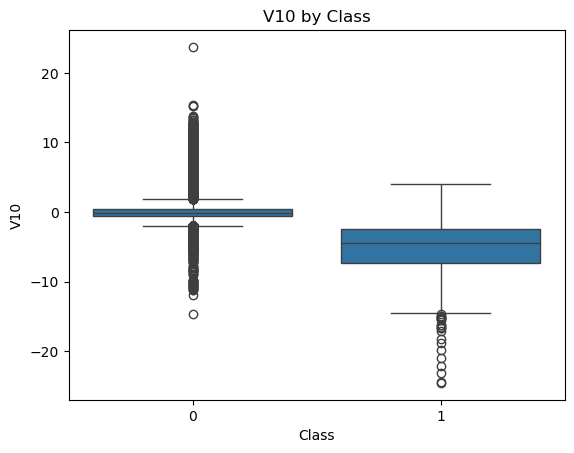

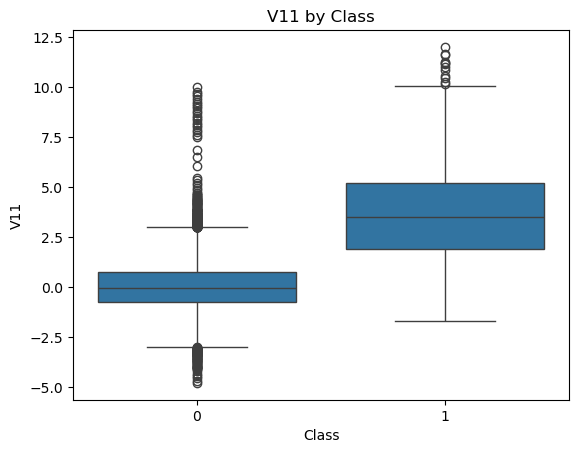

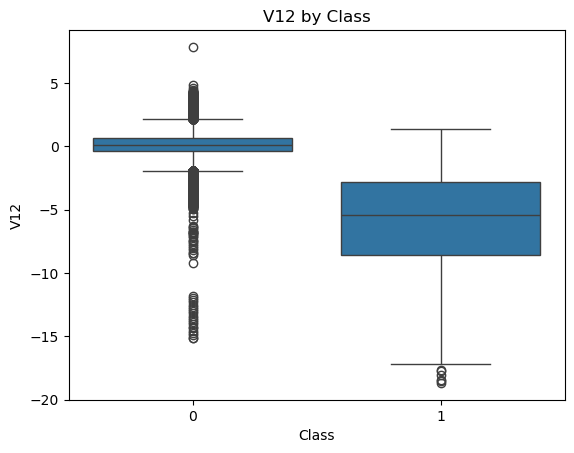

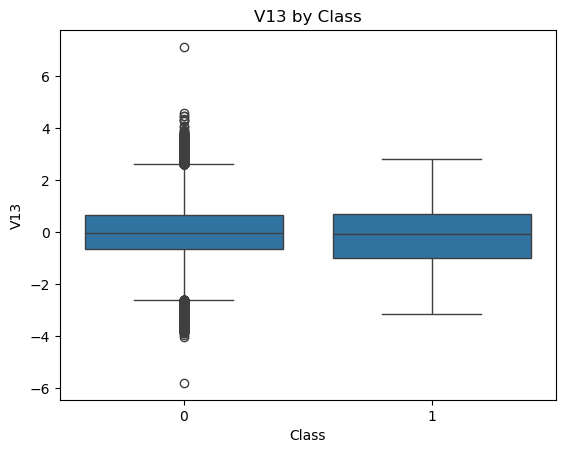

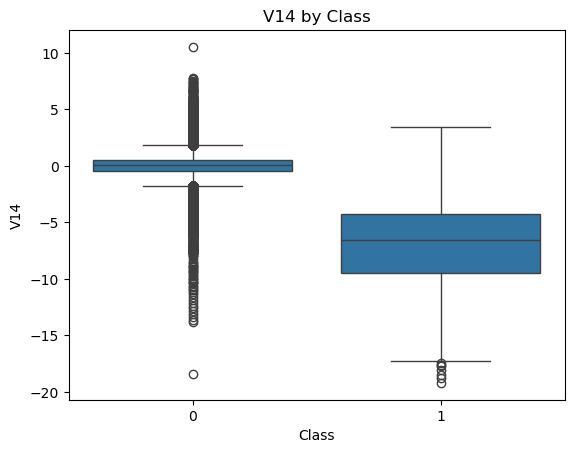

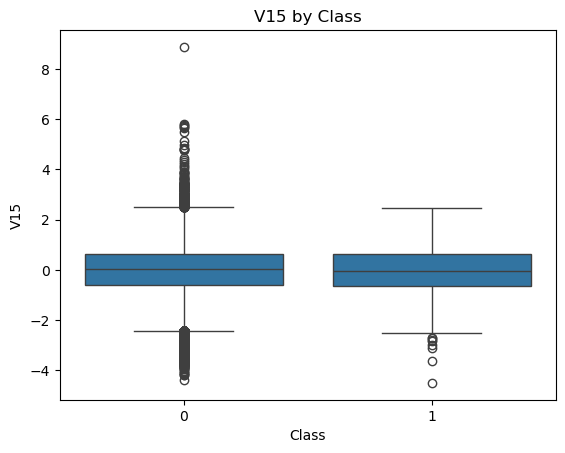

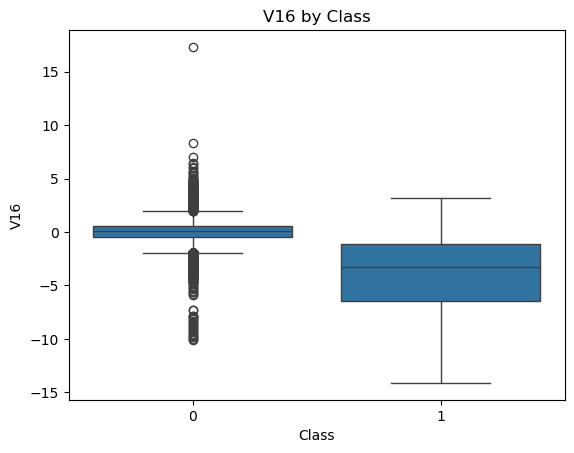

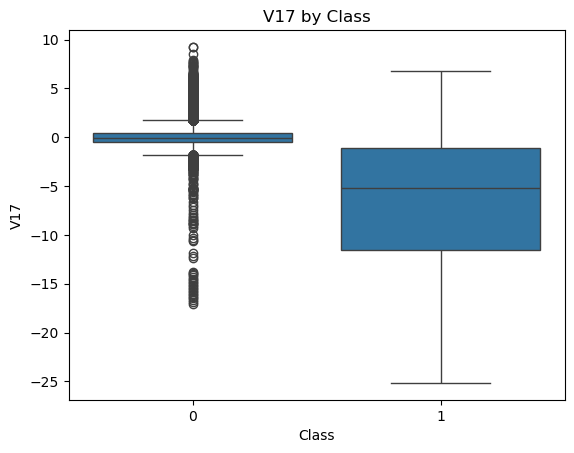

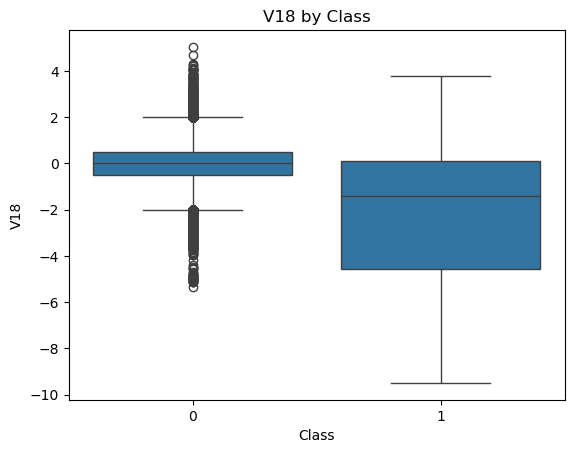

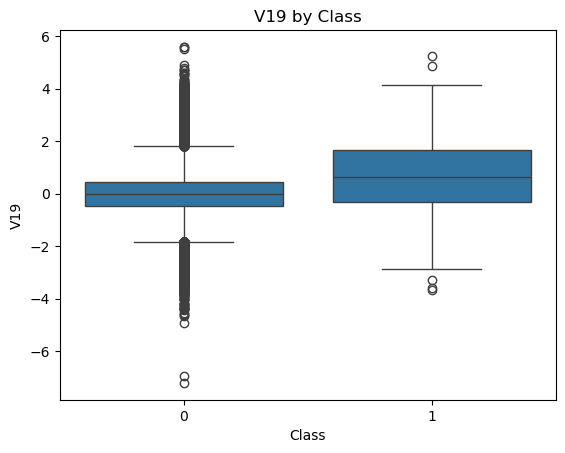

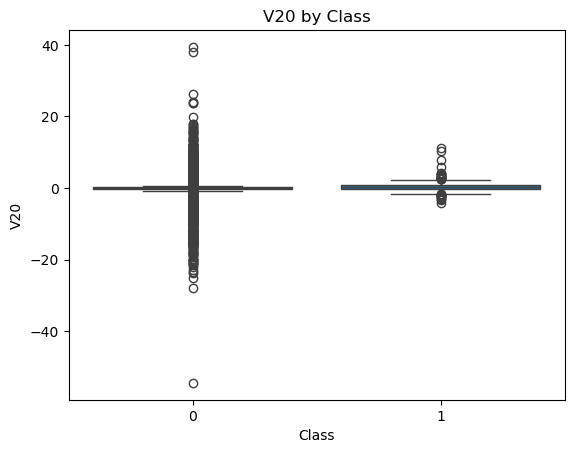

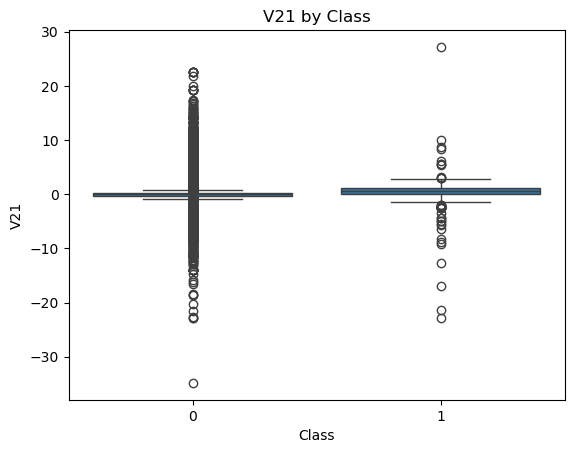

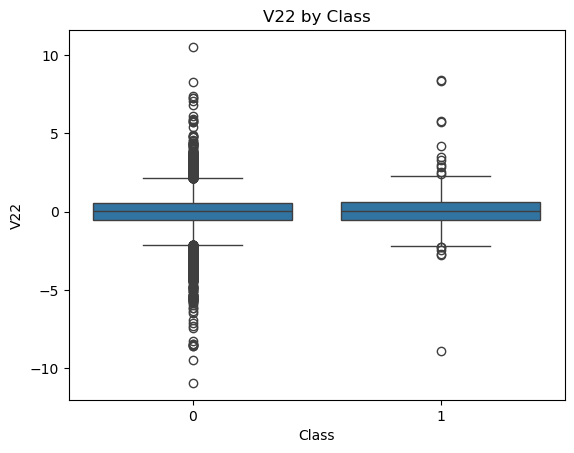

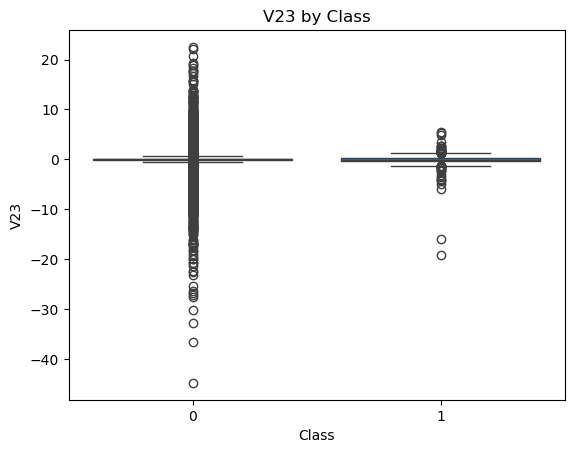

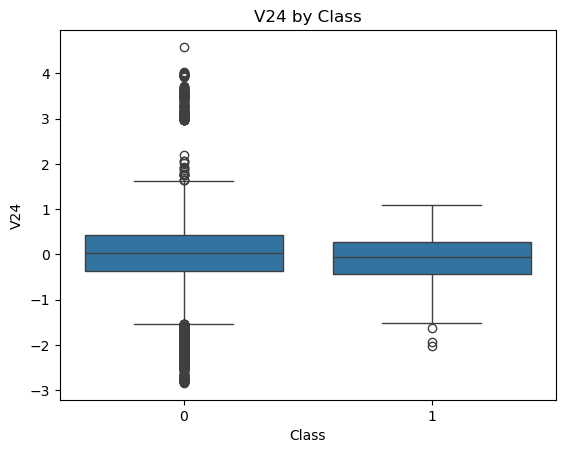

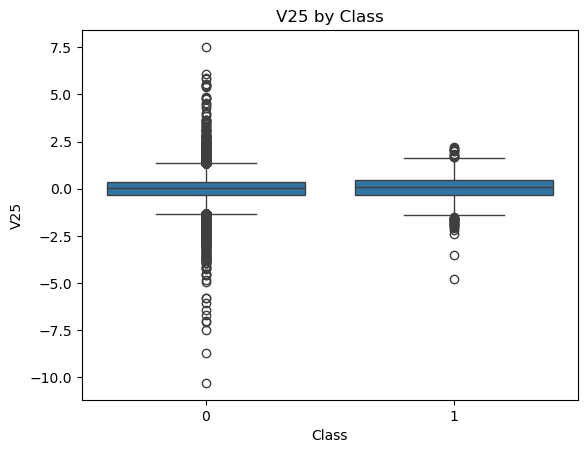

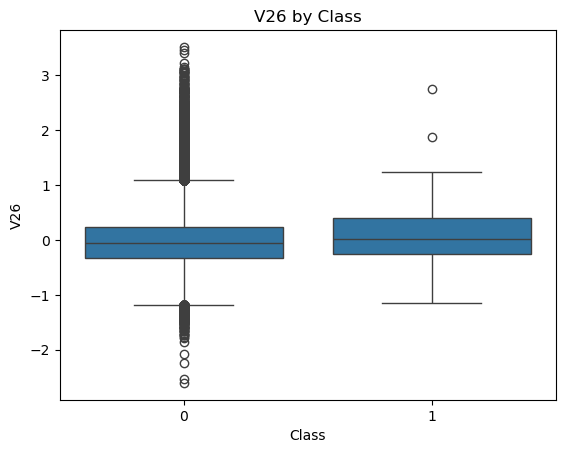

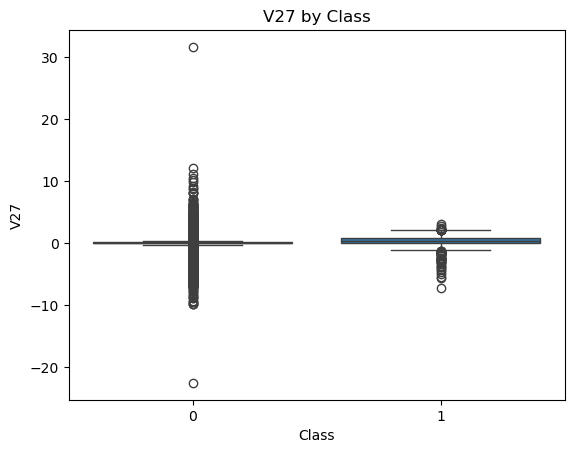

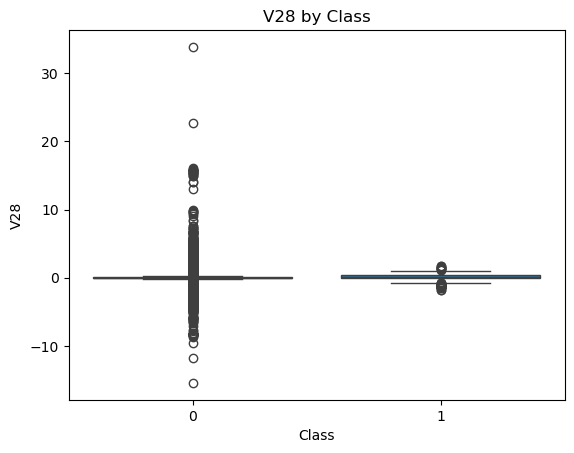

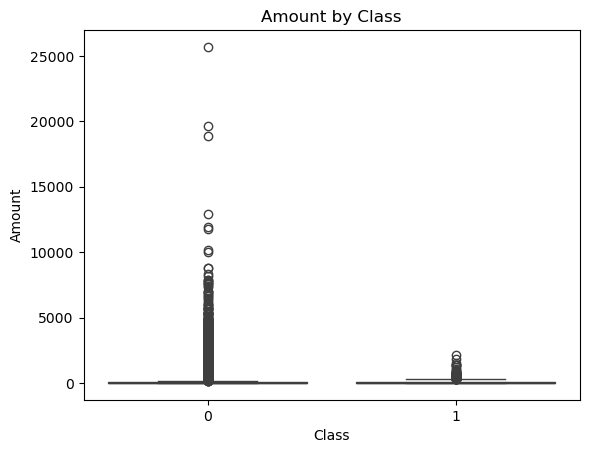

In [9]:
for col in numeric_cols:
    sns.boxplot(x=credit_df['Class'], y=credit_df[col])
    plt.title(f'{col} by Class')
    plt.show()


- Step 4: Feature Engineering

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit_df[['Time', 'Amount']] = scaler.fit_transform(credit_df[['Time', 'Amount']])


Step 5: Data Transformation

- All other features (V1–V28) are already numeric.

- No categorical columns → no one-hot encoding needed.

✅ Dataset is ready for modeling.

- Step 6: Handle Class Imbalance

In [11]:
# Split into training and test set
from sklearn.model_selection import train_test_split

X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
# Apply SMOTE on training data only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check class distribution
import pandas as pd
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_res).value_counts())


Before SMOTE:
 Class
0    226602
1       378
Name: count, dtype: int64
After SMOTE:
 Class
0    226602
1    226602
Name: count, dtype: int64
